<font size=20>**Using SHAP Values for Model Interpretability**<font>

In [1]:
#!pip install shap
#!pip install shap
#! pip install dice-ml


# Imports

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split



import pickle
import shap
shap.initjs()


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


# Loading Data

In [3]:
df = pd.read_csv('../processed_data/cleaned_data_final.csv')
df.head(5)


,name,male,origin,isMarried,isNoble,popularity,isAlive,season,episode,deaths,episode_num
0,Viserys II Targaryen,1,House Targaryen,0,0,0.605351,0,8,The Bells,Lord Varys - Burned alive by Drogon with his f...,71
1,Walder Frey,1,House Frey,1,1,0.896321,0,6,The Winds of Winter,Lord Walder Frey - Throat slit by Arya Stark w...,60
2,Addison Hill,1,House Lannister,0,1,0.267559,1,0,NaN,NaN,0
3,Aemma Arryn,0,House Arryn,1,1,0.183946,0,5,The Gift,Maester Aemon Targaryen - Died of natural causes.,47
4,Sylva Santagar,0,House Martell,1,1,0.043478,1,0,NaN,NaN,0


## Setting X and y

In [4]:
X = df
X = X.drop(columns = ["name",'isAlive','episode','deaths','season',
       'episode_num'], axis=1)


y = df[["isAlive"]]

print(f'Features: {X.columns},\n \ny.head(5):\n{y.head()}')


Features: Index(['male', 'origin', 'isMarried', 'isNoble', 'popularity'], dtype='object'),
 
y.head(5):
   isAlive
0        0
1        0
2        1
3        0
4        1


In [5]:
model_xgb = pickle.load(open( "../got_survival/models_pickle/death_model.pkl", "rb"))


In [11]:
model_xgb


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num_transformer',
                                                  Pipeline(steps=[('standar_scaler',
                                                                   StandardScaler())]),
                                                  ['popularity']),
                                                 ('cat_transformer',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['origin']),
                                                 ('passthrough', 'passthrough',
                                                  ['isMarried', 'isNoble',
                                                   'male'])])),
                ('xgbclassifier',
                 XGBClassifier(base_sc...
                               feature_types=None, gamma=0.558,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None,
                               learning_rate=0.024, max_bin=None,
                               max_cat_threshold=None, max_cat_to_onehot=None,
                               max_delta_step=None, max_depth=4,
                               max_leaves=None, min_child_weight=6, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [24]:
model_xgb.__dict__


{'steps': [('columntransformer',
   ColumnTransformer(transformers=[('num_transformer',
                                    Pipeline(steps=[('standar_scaler',
                                                     StandardScaler())]),
                                    ['popularity']),
                                   ('cat_transformer',
                                    OneHotEncoder(handle_unknown='ignore',
                                                  sparse_output=False),
                                    ['origin']),
                                   ('passthrough', 'passthrough',
                                    ['isMarried', 'isNoble', 'male'])])),
  ('xgbclassifier',
   XGBClassifier(base_score=None, booster=None, callbacks=None,
                 colsample_bylevel=None, colsample_bynode=None,
                 colsample_bytree=None, device=None, early_stopping_rounds=None,
                 enable_categorical=False, eval_metric='logloss',
                 feature_typ

In [6]:
X_processed = model_xgb["columntransformer"].transform(X)


In [7]:
model_xgb["xgbclassifier"].predict(X_processed)


array([0, 0, 0, ..., 1, 1, 0])

In [8]:
shap.initjs()

# Calculate SHAP values
X100 = shap.utils.sample(X_processed, 200)
explainer = shap.TreeExplainer(model_xgb["xgbclassifier"],X100)
shap_values = explainer(X_processed)


[10:41:04] WARNING: /Users/runner/work/xgboost/xgboost/src/c_api/c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [11]:
test.columns = ['Popularity', 'Dothraki', 'Foreign Noble',
       'Foreign Peasant', 'House Arryn',
       'House Baratheon', 'House Bolton', 'House Frey',
       'House Greyjoy', 'House Lannister', 'House Martell',
       'House Stark', 'House Targaryen',
       'House Tully', 'House Tyrell', "Night's Watch",
       'Noble', 'Outlaw', 'Peasant', 'Soldier',
       'Wildling', 'Married', 'Noble', 'Male']


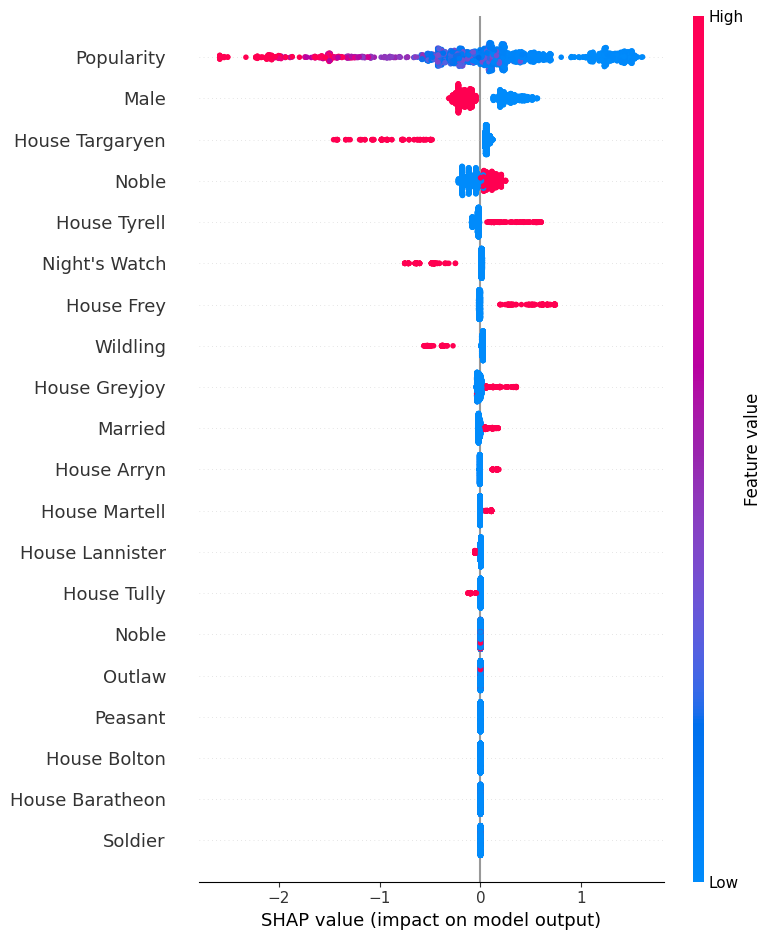

In [12]:
test = pd.DataFrame(X_processed)
#test.columns = [x.split("__")[1] for x in model_xgb["columntransformer"].get_feature_names_out()]
test.columns = ['Popularity', 'Dothraki', 'Foreign Noble',
       'Foreign Peasant', 'House Arryn',
       'House Baratheon', 'House Bolton', 'House Frey',
       'House Greyjoy', 'House Lannister', 'House Martell',
       'House Stark', 'House Targaryen',
       'House Tully', 'House Tyrell', "Night's Watch",
       'Noble', 'Outlaw', 'Peasant', 'Soldier',
       'Wildling', 'Married', 'Noble', 'Male']
shap.summary_plot(shap_values, test)


In [15]:
shap_values_array = np.array([ex.values for ex in shap_values])


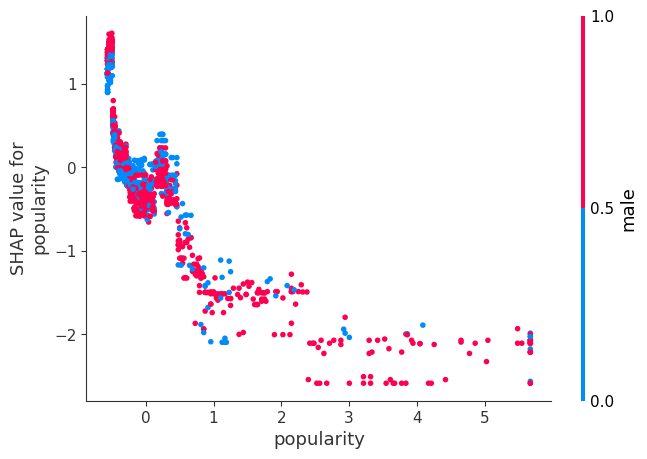

In [204]:
shap.dependence_plot("popularity", shap_values_array, test,interaction_index="male")


In [205]:
explainer.expected_value


0.9819597964544564

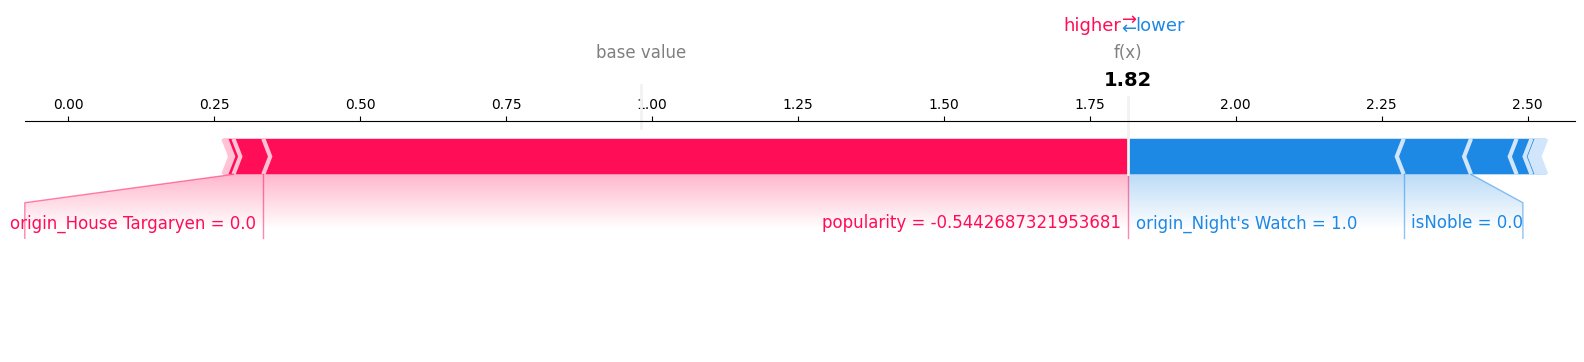

In [206]:
shap.plots.force(explainer.expected_value, shap_values_array[12,:], test.iloc[12, :], matplotlib = True)


In [208]:
y.iloc[25, :]


isAlive    0
Name: 25, dtype: int64

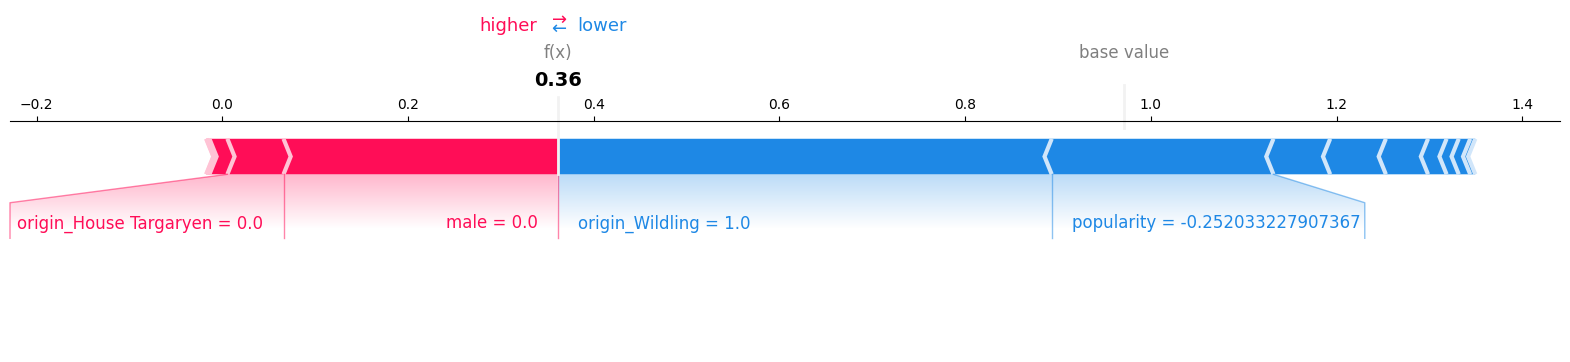

In [176]:
shap.plots.force(explainer.expected_value, shap_values_array[25,:], test.iloc[25, :], matplotlib = True)


isAlive    1
Name: 13, dtype: int64


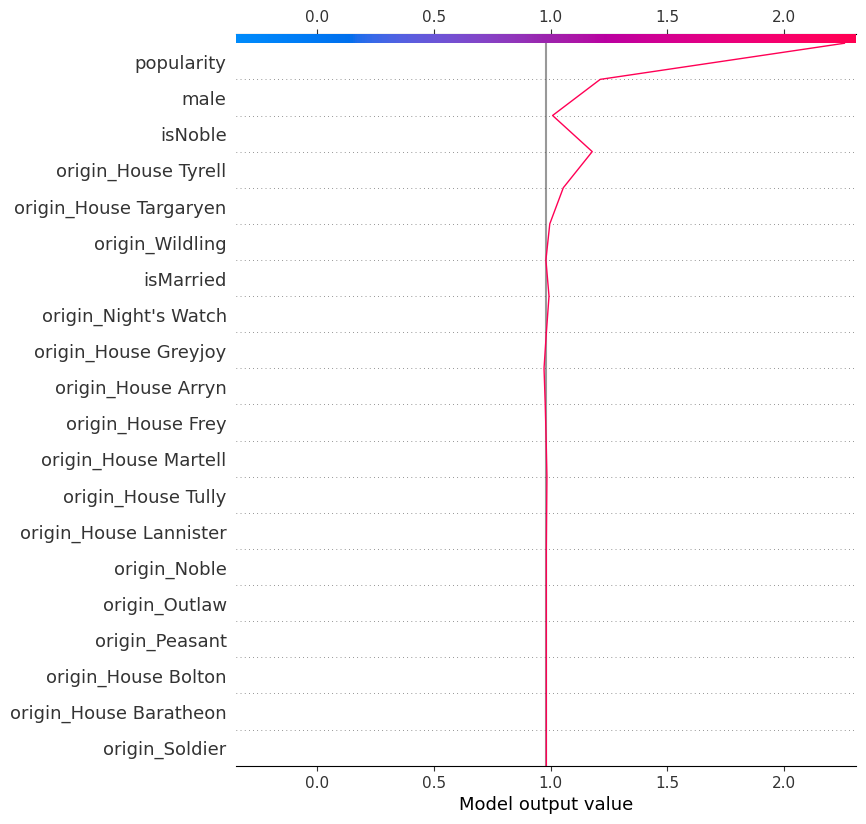

In [19]:
print(y.iloc[13, :])
shap.decision_plot(explainer.expected_value, shap_values_array[13,:], test.columns)


isAlive    0
Name: 3, dtype: int64


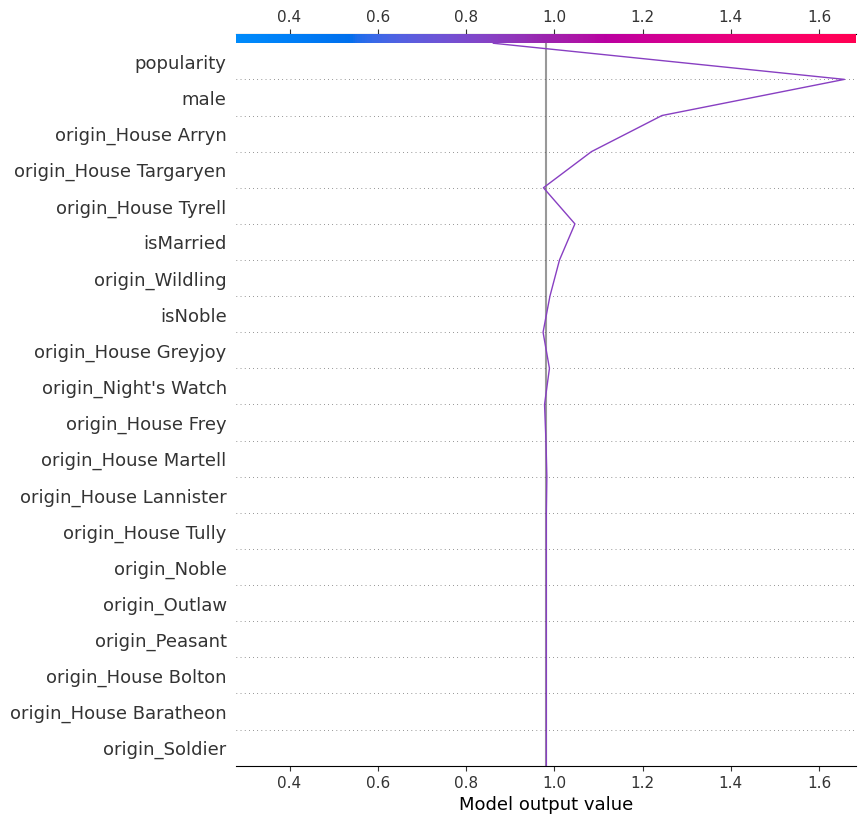

In [20]:
print(y.iloc[3, :])
shap.decision_plot(explainer.expected_value, shap_values_array[3,:], test.columns)


In [70]:
[x.split("__")[1] for x in model_xgb["columntransformer"].get_feature_names_out()]


['popularity',
 'origin_Dothraki',
 'origin_Foreign Noble',
 'origin_Foreign Peasant',
 'origin_House Arryn',
 'origin_House Baratheon',
 'origin_House Bolton',
 'origin_House Frey',
 'origin_House Greyjoy',
 'origin_House Lannister',
 'origin_House Martell',
 'origin_House Stark',
 'origin_House Targaryen',
 'origin_House Tully',
 'origin_House Tyrell',
 "origin_Night's Watch",
 'origin_Noble',
 'origin_Outlaw',
 'origin_Peasant',
 'origin_Soldier',
 'origin_Wildling',
 'isMarried',
 'isNoble',
 'male']

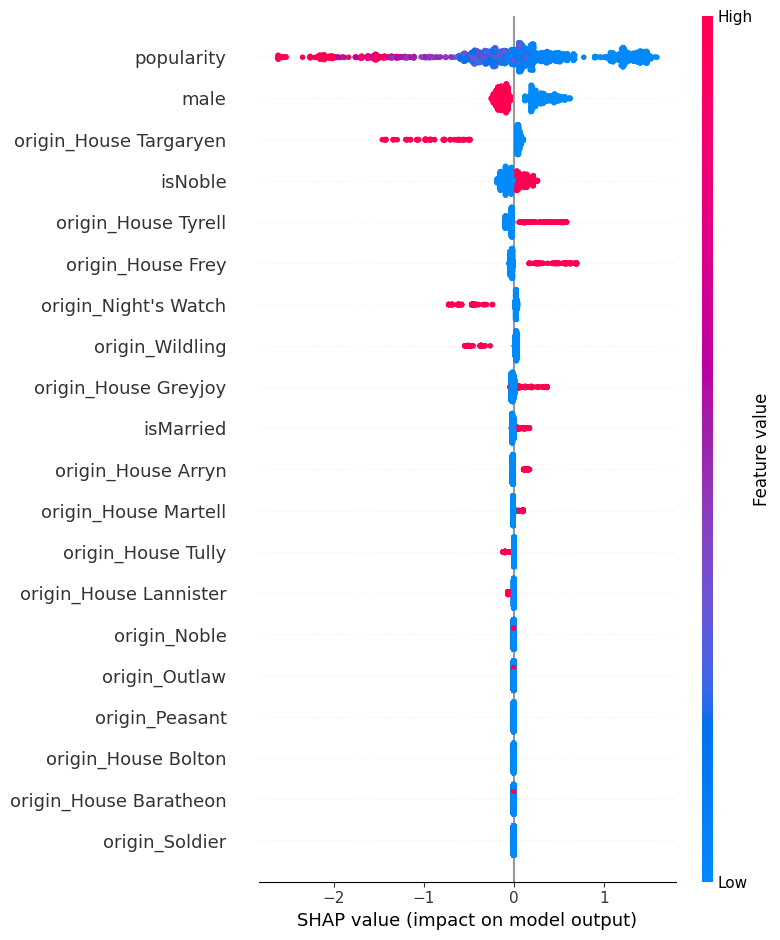

In [71]:
test = pd.DataFrame(X_processed)
test.columns = [x.split("__")[1] for x in model_xgb["columntransformer"].get_feature_names_out()]
shap.summary_plot(shap_values, test)


[1]
popularity                0.582925
origin_Dothraki           0.000000
origin_Foreign Noble      0.000000
origin_Foreign Peasant    0.000000
origin_House Arryn        1.000000
origin_House Baratheon    0.000000
origin_House Bolton       0.000000
origin_House Frey         0.000000
origin_House Greyjoy      0.000000
origin_House Lannister    0.000000
origin_House Martell      0.000000
origin_House Stark        0.000000
origin_House Targaryen    0.000000
origin_House Tully        0.000000
origin_House Tyrell       0.000000
origin_Night's Watch      0.000000
origin_Noble              0.000000
origin_Outlaw             0.000000
origin_Peasant            0.000000
origin_Soldier            0.000000
origin_Wildling           0.000000
isMarried                 1.000000
isNoble                   1.000000
male                      0.000000
Name: 3, dtype: float64


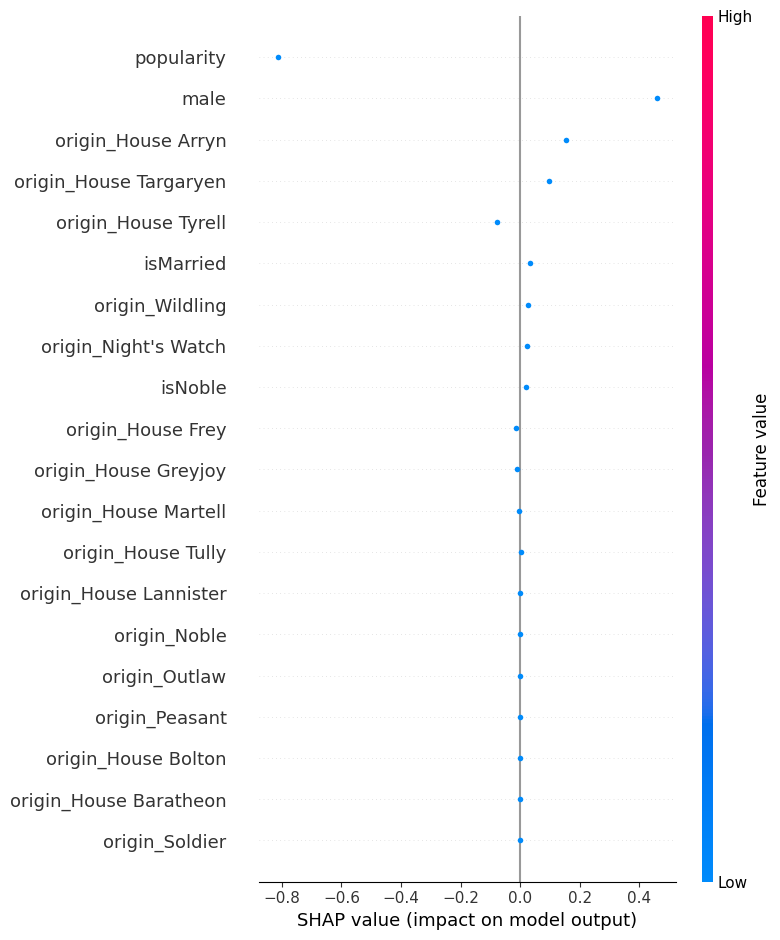

In [124]:
i = 3 #Unpopular Targaryen -> 38
sample = test.iloc[i:i+1]
shap_values = explainer(sample)
print(model_xgb["xgbclassifier"].predict(sample))
print(sample.loc[i])
shap.summary_plot(shap_values, sample)


In [125]:
e1 = exp.generate_counterfactuals(test[i:i+1], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

Query instance (original outcome : 1)


,popularity,origin_Dothraki,origin_Foreign Noble,origin_Foreign Peasant,origin_House Arryn,origin_House Baratheon,origin_House Bolton,origin_House Frey,origin_House Greyjoy,origin_House Lannister,...,origin_Night's Watch,origin_Noble,origin_Outlaw,origin_Peasant,origin_Soldier,origin_Wildling,isMarried,isNoble,male,isAlive
0,0.582925,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1



Diverse Counterfactual set (new outcome: 0)


,popularity,origin_Dothraki,origin_Foreign Noble,origin_Foreign Peasant,origin_House Arryn,origin_House Baratheon,origin_House Bolton,origin_House Frey,origin_House Greyjoy,origin_House Lannister,...,origin_Night's Watch,origin_Noble,origin_Outlaw,origin_Peasant,origin_Soldier,origin_Wildling,isMarried,isNoble,male,isAlive
0,3.9442237,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,2.9268876,-,-,-,-,-,-,-,-,-,...,-,-,-2.7755575615628914e-17,-,-,-,-,-,-,0.0


  Using cached pandas-1.5.3-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.3
    Uninstalling pandas-2.1.3:
      Successfully uninstalled pandas-2.1.3


In [78]:
test.columns


Index(['popularity', 'origin_Dothraki', 'origin_Foreign Noble',
       'origin_Foreign Peasant', 'origin_House Arryn',
       'origin_House Baratheon', 'origin_House Bolton', 'origin_House Frey',
       'origin_House Greyjoy', 'origin_House Lannister',
       'origin_House Martell', 'origin_House Stark', 'origin_House Targaryen',
       'origin_House Tully', 'origin_House Tyrell', 'origin_Night's Watch',
       'origin_Noble', 'origin_Outlaw', 'origin_Peasant', 'origin_Soldier',
       'origin_Wildling', 'isMarried', 'isNoble', 'male'],
      dtype='object')

In [105]:
merged.dtypes


popularity                float64
origin_Dothraki           float64
origin_Foreign Noble      float64
origin_Foreign Peasant    float64
origin_House Arryn        float64
origin_House Baratheon    float64
origin_House Bolton       float64
origin_House Frey         float64
origin_House Greyjoy      float64
origin_House Lannister    float64
origin_House Martell      float64
origin_House Stark        float64
origin_House Targaryen    float64
origin_House Tully        float64
origin_House Tyrell       float64
origin_Night's Watch      float64
origin_Noble              float64
origin_Outlaw             float64
origin_Peasant            float64
origin_Soldier            float64
origin_Wildling           float64
isMarried                 float64
isNoble                   float64
male                      float64
isAlive                     int64
dtype: object

In [117]:
import dice_ml

# Dataset for training an ML model
d = dice_ml.Data(dataframe=test2,
                 continuous_features=list(merged.columns[:-1]),
                 outcome_name='isAlive')

# Pre-trained ML model
m = dice_ml.Model(model_xgb["xgbclassifier"], backend='sklearn')
# DiCE explanation instance
exp = dice_ml.Dice(d,m)


In [118]:
e1 = exp.generate_counterfactuals(test[i:i+1], total_CFs=2, desired_class="opposite")
e1.visualize_as_dataframe(show_only_changes=True)


  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:00<00:00,  1.26it/s]

Query instance (original outcome : 1)


,popularity,origin_Dothraki,origin_Foreign Noble,origin_Foreign Peasant,origin_House Arryn,origin_House Baratheon,origin_House Bolton,origin_House Frey,origin_House Greyjoy,origin_House Lannister,...,origin_Night's Watch,origin_Noble,origin_Outlaw,origin_Peasant,origin_Soldier,origin_Wildling,isMarried,isNoble,male,isAlive
0,-0.565143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1



Diverse Counterfactual set (new outcome: 0)


,popularity,origin_Dothraki,origin_Foreign Noble,origin_Foreign Peasant,origin_House Arryn,origin_House Baratheon,origin_House Bolton,origin_House Frey,origin_House Greyjoy,origin_House Lannister,...,origin_Night's Watch,origin_Noble,origin_Outlaw,origin_Peasant,origin_Soldier,origin_Wildling,isMarried,isNoble,male,isAlive
0,1.47389027,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0.0
1,3.60421029,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,0.6,0.0


In [110]:
i


38